<h1 align=center> Facial Expression Recognition Classifier Model</h1>



### Import Libraries
- Let us import all the required Libraries and Packages including Tensorflow


In [2]:
import os
import utils
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# To set the backend of matplotlib to the 'inline' backend
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image


### Plot Sample Images
- Let us have a look at random images from the Dataset

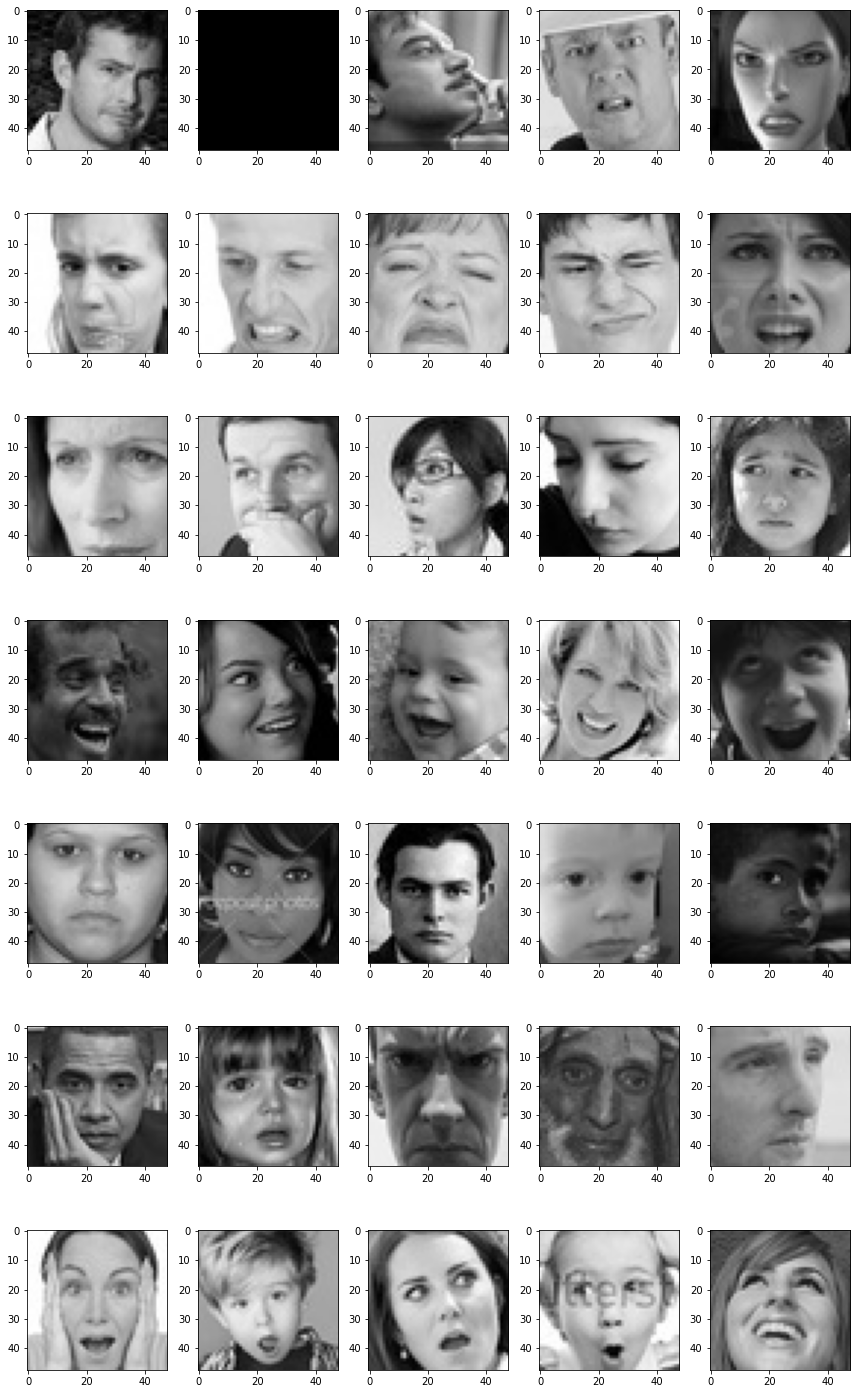

In [3]:
utils.datasets.fer.plot_example_images(plt).show()

### Data Sets
- Let us look at the number of Images in Training and Testing Datasets

In [5]:

print("Images in Training Data")
print("_______________________")
for expression in os.listdir("training_data/"):
    print(str(len(os.listdir("training_data/" + expression))) + " " + expression + " images")

print("\n")

print("Images in Testing Data")
print("_______________________")
for expression in os.listdir("testing_data/"):
    print(str(len(os.listdir("testing_data/" + expression))) + " " + expression + " images")
    


Images in Training Data
_______________________
3995 angry images
436 disgust images
4097 fear images
7214 happy images
4965 neutral images
4830 sad images
3171 surprise images


Images in Testing Data
_______________________
958 angry images
111 disgust images
1024 fear images
1774 happy images
1233 neutral images
1247 sad images
831 surprise images


### Create Training and Validation Batches
- Using the ImageDataGenerators Let us create Training and Validation Batches by loading images from corresponding directories

In [6]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("training_data/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("testing_data/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Create Convolutional Nueral Network (CNN) Model
- Let us create a Nueral Network using 4 Convolutional Layers and 2 Fully Connected dense Layers.

In [7]:
# Initialising the CNN
model = Sequential()

# 1st Convolution Layer

# There are 64 (3,3) filters with "same" Padding and Shape of the Input_Image is (48,48,1)
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))  

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))




# 2nd Convolution layer

# There are 128 (5,5) filters with "same" Padding 
model.add(Conv2D(128,(5,5), padding='same'))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))




# 3rd Convolution layer

# There are 512 (3,3) filters with "same" Padding 

model.add(Conv2D(512,(3,3), padding='same'))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))





# 4th Convolution layer

# There are 512 (3,3) filters with "same" Padding 
model.add(Conv2D(512,(3,3), padding='same'))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer  
model.add(Dropout(0.25))



# Flattening
model.add(Flatten())


# Fully connected layer 1st layer of 256 nuerons
model.add(Dense(256))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a dropout layer  
model.add(Dropout(0.25))



# Fully connected layer 2nd layer of 512 nuerons
model.add(Dense(512))

# Normalization
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a dropout layer  
model.add(Dropout(0.25))

# Adding a final Dense Layer with 7 outputs corresponding to 7 different emotions with a "softmax" Activation Function 
model.add(Dense(7, activation='softmax'))

### Compiling the Model
- Let us use Adam Optimizer

In [9]:
# let us choose a Learning rate of 0.0005 
opt = Adam(lr=0.0005)

# As we have Categorical Values we will use 'categorical_crossentropy' loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Let us check the details of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### Train and Evaluate Model

In [10]:
%%time

# Let us train the Model 15 times
epochs = 15

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# Create a Callback which reduces the Learning rate by a factor of "0.1" when the val_loss does not decrease
# after 2 epochs also and allowing the minimum value of Learning Rate to be 0.0001
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')


# Create another Callback which saves the Model Weights by monitoring the Val_Accuracy
checkpoint = ModelCheckpoint("fer_model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

# List of callbacks 
callbacks = [checkpoint, reduce_lr]

# Fitting the model .
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Epoch 1/15
 63/448 [===>..........................] - ETA: 19:13 - loss: 2.0820 - accuracy: 0.2076

KeyboardInterrupt: 

### Represent Model as JSON String

In [12]:
# Converting the model into JSON format and storing it in "fer_model.json" file. 
model_json = model.to_json()
with open("fer_model.json", "w") as json_file:
    json_file.write(model_json)